In [ ]:
pip install scipy matplotlib


In [ ]:
import scipy.io
import matplotlib.pyplot as plt

dict_keys(['val'])


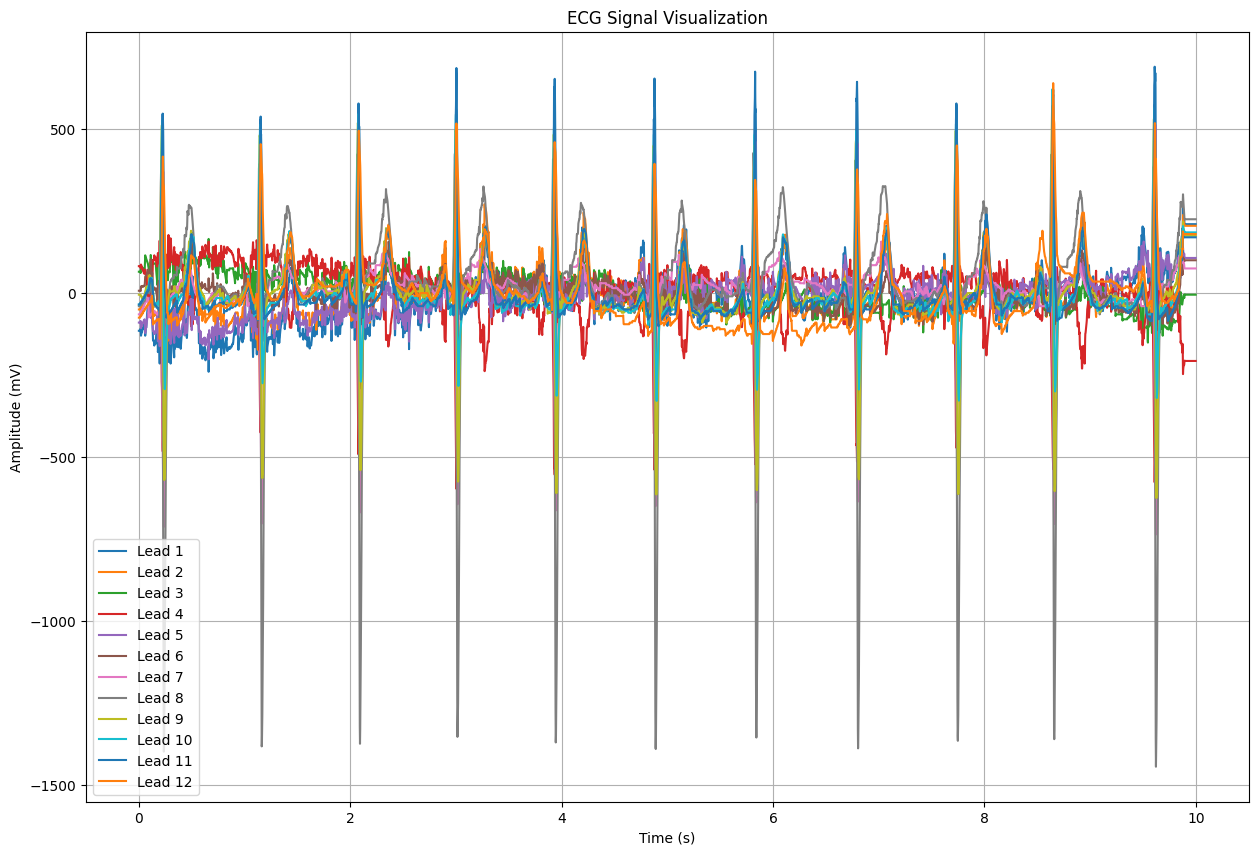

In [ ]:
# Load the .mat file
mat_file_path = "/content/HR00001.mat"  # Replace with your .mat file path
data = scipy.io.loadmat(mat_file_path)

# Inspect the keys in the loaded .mat file
print(data.keys())

# Extract the ECG signal (assuming the key is 'val')
# PTB-XL signals are typically stored under the key 'val'
ecg_signal = data['val']  # Shape: (number_of_leads, number_of_samples)

# Define parameters (replace with values from .hea if available)
sampling_frequency = 500  # Hz (default for PTB-XL)
time = [i / sampling_frequency for i in range(ecg_signal.shape[1])]

# Plot signals for all leads
plt.figure(figsize=(15, 10))
for lead_idx in range(ecg_signal.shape[0]):
    plt.plot(time, ecg_signal[lead_idx, :], label=f"Lead {lead_idx + 1}")

# Add titles and labels
plt.title("ECG Signal Visualization")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.grid(True)
plt.show()

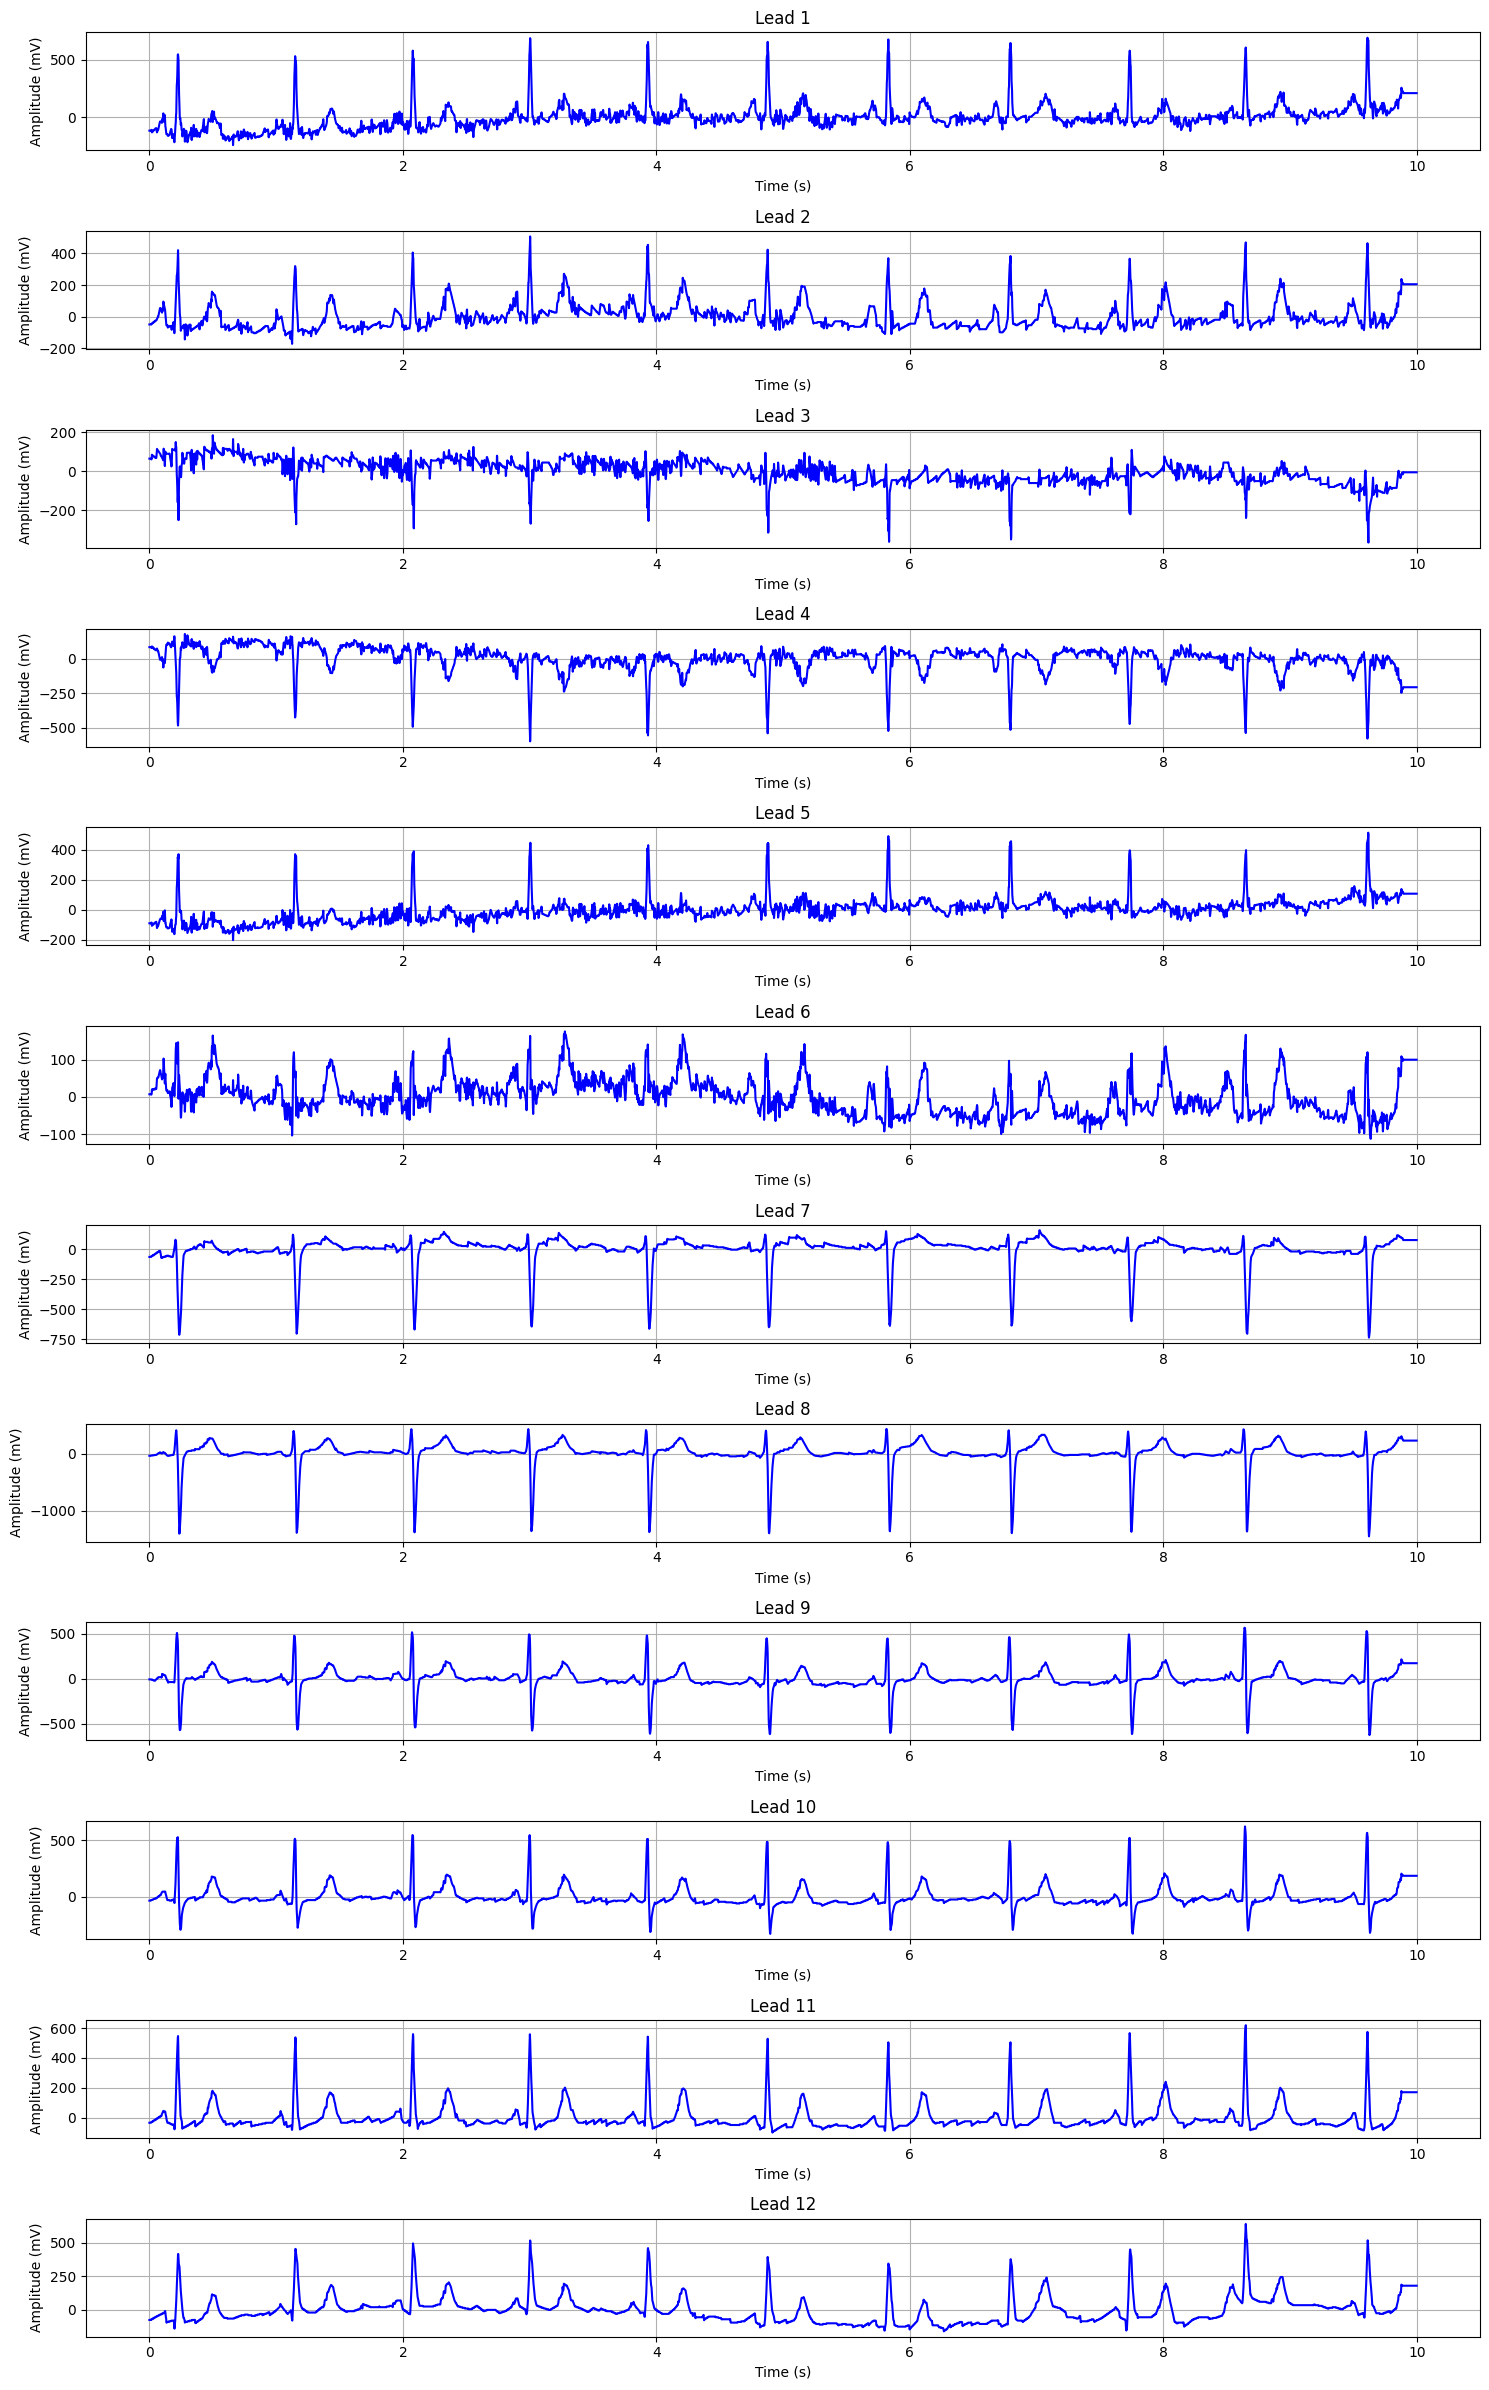

In [ ]:
import scipy.io
import matplotlib.pyplot as plt

# Load the .mat file
mat_file_path = "/content/HR00001.mat"  # Replace with your .mat file path
data = scipy.io.loadmat(mat_file_path)

# Extract the ECG signal (assuming the key is 'val')
ecg_signal = data['val']  # Shape: (number_of_leads, number_of_samples)

# Define parameters (replace with values from .hea if available)
sampling_frequency = 500  # Hz (default for PTB-XL)
time = [i / sampling_frequency for i in range(ecg_signal.shape[1])]

# Plot each lead in a separate subplot
num_leads = ecg_signal.shape[0]
plt.figure(figsize=(15, 2 * num_leads))  # Adjust height based on the number of leads

for lead_idx in range(num_leads):
    plt.subplot(num_leads, 1, lead_idx + 1)  # Create a subplot for each lead
    plt.plot(time, ecg_signal[lead_idx, :], color='blue')
    plt.title(f"Lead {lead_idx + 1}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/ptbxl_database.csv')

In [ ]:
data.head(10)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
5,6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,...,True,", V1",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr
6,7,16193.0,54.0,0,NaN,83.0,2.0,0.0,CS-12 E,1984-11-28 13:32:22,...,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00007_lr,records500/00000/00007_hr
7,8,11275.0,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,1984-12-01 14:49:52,...,True,", II,AVF",", I-AVF,",NaN,NaN,NaN,NaN,9,records100/00000/00008_lr,records500/00000/00008_hr
8,9,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,10,records100/00000/00009_lr,records500/00000/00009_hr
9,10,9456.0,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1984-12-12 14:12:46,...,True,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00010_lr,records500/00000/00010_hr


In [ ]:
import pandas as pd

# Load the ptbxl database CSV file
df = pd.read_csv('/content/ptbxl_database.csv')

# Select only the relevant columns
df_filtered = df[['ecg_id', 'report', 'scp_codes', 'filename_lr', 'filename_hr']]

# Function to modify the filenames (remove 'records100', 'records500' and '_lr', '_hr')
def modify_filename(filename):
    # Remove 'records100' or 'records500' and '_lr' or '_hr'
    return filename.split('/')[1]  # This takes the part after '00000/00001_lr'

# Apply the filename modification to 'filename_lr' and 'filename_hr'
df_filtered['filename_lr'] = df_filtered['filename_lr'].apply(modify_filename)
df_filtered['filename_hr'] = df_filtered['filename_hr'].apply(modify_filename)

# Save the modified DataFrame to a new CSV file
df_filtered.to_csv('ptbxl_filtered.csv', index=False)

print("The filtered CSV has been saved as 'ptbxl_filtered.csv'")


<ipython-input-1-05631ea3a16f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_lr'] = df_filtered['filename_lr'].apply(modify_filename)
<ipython-input-1-05631ea3a16f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_hr'] = df_filtered['filename_hr'].apply(modify_filename)


The filtered CSV has been saved as 'ptbxl_filtered.csv'


In [ ]:
import pandas as pd

# Load the ptbxl database CSV file
df = pd.read_csv('/content/ptbxl_database.csv')

# Select only the relevant columns
df_filtered = df[['ecg_id', 'report', 'scp_codes', 'filename_lr', 'filename_hr']]

# Function to modify the filenames (remove 'records100', 'records500' and '_lr', '_hr')
def modify_filename(filename):
    # Remove 'records100' or 'records500' and '_lr' or '_hr'
    filename_parts = filename.split('/')[-1]  # Get the last part (e.g., '00000/00001_lr')
    filename_clean = filename_parts.split('_')[0]  # Get the part before '_lr' or '_hr'
    return filename_clean

# Apply the filename modification to 'filename_lr' and 'filename_hr'
df_filtered['filename_lr'] = df_filtered['filename_lr'].apply(modify_filename)
df_filtered['filename_hr'] = df_filtered['filename_hr'].apply(modify_filename)

# Save the modified DataFrame to a new CSV file
df_filtered.to_csv('ptbxl_filtered.csv', index=False)

print("The filtered CSV has been saved as 'ptbxl_filtered.csv'")


The filtered CSV has been saved as 'ptbxl_filtered.csv'


<ipython-input-2-8f5aae2829a6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_lr'] = df_filtered['filename_lr'].apply(modify_filename)
<ipython-input-2-8f5aae2829a6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_hr'] = df_filtered['filename_hr'].apply(modify_filename)


In [ ]:
import pandas as pd

# Step 1: Load the ptbxl database CSV file
df = pd.read_csv('/content/ptbxl_database.csv')

# Step 2: Select only the relevant columns
df_filtered = df[['ecg_id', 'report', 'scp_codes', 'filename_lr', 'filename_hr']]

# Step 3: Function to modify the filenames
def modify_filename(filename):
    # Split by '/' to extract the numeric part (e.g., '00000/00001')
    path_parts = filename.split('/')
    numeric_part = path_parts[-1].split('_')[0]  # Extract the part before '_lr' or '_hr'
    return numeric_part

# Apply the filename modification to 'filename_lr' and 'filename_hr'
df_filtered['filename_lr'] = df_filtered['filename_lr'].apply(modify_filename)
df_filtered['filename_hr'] = df_filtered['filename_hr'].apply(modify_filename)

# Step 4: Save the modified DataFrame to a new CSV file
df_filtered.to_csv('ptbxl_filtered.csv', index=False)

# Print confirmation
print("The filtered CSV has been saved as 'ptbxl_filtered.csv'")


The filtered CSV has been saved as 'ptbxl_filtered.csv'


<ipython-input-4-77498689298a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_lr'] = df_filtered['filename_lr'].apply(modify_filename)
<ipython-input-4-77498689298a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_hr'] = df_filtered['filename_hr'].apply(modify_filename)


In [ ]:
import pandas as pd

# Load the ptbxl database CSV file
df = pd.read_csv('/content/ptbxl_database.csv')

# Select only the relevant columns
df_filtered = df[['ecg_id', 'report', 'scp_codes', 'filename_lr', 'filename_hr']]

# Use slicing to modify the filenames
df_filtered['filename_lr'] = df_filtered['filename_lr'].str.slice(10, -3)  # Removes 'records100/' and '_lr'
df_filtered['filename_hr'] = df_filtered['filename_hr'].str.slice(10, -3)  # Removes 'records500/' and '_hr'

# Save the modified DataFrame to a new CSV file
df_filtered.to_csv('ptbxl_filtered.csv', index=False)

# Print confirmation
print("The filtered CSV has been saved as 'ptbxl_filtered.csv'")


<ipython-input-6-af6390c8d137>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_lr'] = df_filtered['filename_lr'].str.slice(10, -3)  # Removes 'records100/' and '_lr'
<ipython-input-6-af6390c8d137>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['filename_hr'] = df_filtered['filename_hr'].str.slice(10, -3)  # Removes 'records500/' and '_hr'


The filtered CSV has been saved as 'ptbxl_filtered.csv'


In [ ]:
import pandas as pd

# Load the filtered PTB-XL database
filtered_ptbxl = pd.read_csv("/content/ptbxl_filtered.csv")

# Load the SCP statements CSV
scp_statements = pd.read_csv("/content/scp_statements(1).csv")

# Prepare the output DataFrame
output_data = filtered_ptbxl.copy()

# Define maximum possible statements to handle
MAX_STATEMENTS = 5

# Add placeholder columns for new statements
for i in range(1, MAX_STATEMENTS + 1):
    output_data[f"Statement_{i}"] = None
    output_data[f"SCP_ECG_{i}"] = None

# Process each row in the filtered PTB-XL data
for index, row in filtered_ptbxl.iterrows():
    scp_codes = eval(row["scp_codes"])  # Convert the string representation of dict to actual dict
    matching_keys = [key for key, value in scp_codes.items() if value > 0]

    for i, key in enumerate(matching_keys[:MAX_STATEMENTS]):  # Limit to MAX_STATEMENTS
        match = scp_statements[scp_statements["diagnostic_subclass"] == key]
        if not match.empty:
            output_data.at[index, f"Statement_{i+1}"] = match.iloc[0]["Statement Category"]
            output_data.at[index, f"SCP_ECG_{i+1}"] = match.iloc[0]["SCP-ECG Statement Description"]

    # If only one statement exists, replicate it in the other columns
    if len(matching_keys) == 1:
        for j in range(1, MAX_STATEMENTS):
            output_data.at[index, f"Statement_{j+1}"] = output_data.at[index, "Statement_1"]
            output_data.at[index, f"SCP_ECG_{j+1}"] = output_data.at[index, "SCP_ECG_1"]

# Save the output to a new CSV file
output_data.to_csv("filtered_ptbxl_with_statements.csv", index=False)

In [ ]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15719 sha256=7b141494d28282fe2f66c5f0c13fd9fe621a520cead03c907ca2cd59e8664a1b
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succes

In [ ]:
import pandas as pd
from googletrans import Translator

# Load the filtered PTB-XL database with statements
filtered_ptbxl_with_statements = pd.read_csv("/content/filtered_ptbxl_with_statements.csv")

# Initialize the Google Translator
translator = Translator()

# Translate the 'report' column from German to English
translated_reports = []
for report in filtered_ptbxl_with_statements['report']:
    try:
        if pd.isnull(report) or not isinstance(report, str):  # Check for None or invalid entries
            translated_reports.append(None)
            continue
        translated_text = translator.translate(report, src='de', dest='en').text
        translated_reports.append(translated_text)
    except Exception as e:
        translated_reports.append(None)  # Handle potential translation errors
        print(f"Error translating report '{report}': {e}")

# Add the translated reports to the DataFrame
filtered_ptbxl_with_statements['report_en'] = translated_reports

# Save the updated DataFrame to a new CSV file
filtered_ptbxl_with_statements.to_csv("filtered_ptbxl_with_statements_translated.csv", index=False)


Error translating report 'sinusrhythmus periphere niederspannung': 'NoneType' object has no attribute 'group'
Error translating report 'sinusbradykardie sonst normales ekg': 'NoneType' object has no attribute 'group'
Error translating report 'sinusrhythmus normales ekg': 'NoneType' object has no attribute 'group'
Error translating report 'sinusrhythmus normales ekg': 'NoneType' object has no attribute 'group'
Error translating report 'sinusrhythmus normales ekg': 'NoneType' object has no attribute 'group'
Error translating report 'sinusrhythmus normales ekg': 'NoneType' object has no attribute 'group'
Error translating report 'sinusrhythmus linkstyp t abnormal, wahrscheinlich    inferiorer myokardschaden qt-verlÄngerung': 'NoneType' object has no attribute 'group'
Error translating report 'sinusrhythmus linkstyp qrs(t) abnormal    inferiorer infarkt     alter unbest.': 'NoneType' object has no attribute 'group'
Error translating report 'sinusrhythmus normales ekg': 'NoneType' object ha

KeyboardInterrupt: 

In [ ]:
pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

# Load the filtered PTB-XL database with statements
filtered_ptbxl_with_statements = pd.read_csv("/content/filtered_ptbxl_with_statements.csv")

# Translate the 'report' column from German to English
translated_reports = []
for report in filtered_ptbxl_with_statements['report']:
    try:
        if pd.isnull(report) or not isinstance(report, str):  # Check for None or invalid entries
            translated_reports.append(None)
            continue
        translated_text = GoogleTranslator(source='de', target='en').translate(report)
        translated_reports.append(translated_text)
    except Exception as e:
        translated_reports.append(None)  # Handle potential translation errors
        print(f"Error translating report '{report}': {e}")

# Add the translated reports to the DataFrame
filtered_ptbxl_with_statements['report_en'] = translated_reports

# Save the updated DataFrame to a new CSV file
filtered_ptbxl_with_statements.to_csv("filtered_ptbxl_with_statements_translated.csv", index=False)


KeyboardInterrupt: 

In [ ]:
data = pd.read_csv('/content/filtered_ptbxl_with_statements.csv')

In [ ]:
data['report'].value_counts()

,count
report,
sinus rhythm. normal ecg.,1734
sinusrhythmus lagetyp normal normales ekg,1264
sinusrhythmus lagetyp normal normales ekg 4.46 unbestÄtigter bericht,1045
sinusrhythmus normales ekg,687
trace only requested.,343
...,...
sinusrhythmus schwierig bestimmbare qrs-achse r-s #bergang in v ableitungen nach links verschoben niederspannungs-ekg linksposteriorer hemiblock qrs(t) abnormal anterolateraler myokardschaden nicht auszuschliessen inferiorer myokardschaden nicht aus,1
"sinusrhythmus lagetyp normal qrs(t) abnorm septaler infarkt nicht auszuschliessen st & t abnorm, wahrscheinlich inferiore ischÄmie oder linksbelastung 4.46 unbestÄtigter bericht",1
sinustachykardie linkstyp periphere niederspannung qrs(t) abnorm anteroseptaler infarkt wahrscheinlich alt 4.46 unbestÄtigter bericht,1


In [ ]:
import pandas as pd

# Load the filtered PTB-XL database with statements
filtered_ptbxl_with_statements = pd.read_csv("/content/filtered_ptbxl_with_statements.csv")

# Get the value counts of the 'report' column
report_value_counts = filtered_ptbxl_with_statements['report'].value_counts().reset_index()
report_value_counts.columns = ['report', 'count']

# Save the value counts to a separate CSV
report_value_counts.to_csv("report_value_counts.csv", index=False)

print("Value counts of 'report' column saved to 'report_value_counts.csv'.")


Value counts of 'report' column saved to 'report_value_counts.csv'.


In [ ]:
GIVE ME 2 MINutes

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

# Load the value_counts CSV
report_value_counts = pd.read_csv("/content/report_value_counts.csv")

# Translate the 'report' column from German to English
translated_reports = []
for report in report_value_counts['report']:
    try:
        if pd.isnull(report) or not isinstance(report, str):
            translated_reports.append(None)
            continue
        translated_text = GoogleTranslator(source='de', target='en').translate(report)
        translated_reports.append(translated_text)
    except Exception as e:
        translated_reports.append(None)  # Handle translation errors
        print(f"Error translating report '{report}': {e}")

# Add the translations to the DataFrame
report_value_counts['report_translated'] = translated_reports

# Save the translated value_counts to a new CSV file
report_value_counts.to_csv("translated_report_value_counts.csv", index=False)

print("Translated value_counts saved as 'translated_report_value_counts.csv'.")


Error translating report 'sinusrytm p fÖrlÄngd mÅttliga amplitudkrit. fÖr vÄnster kammarkhypertrofi avvikande qrs(t) fÖrlopp    inferior infarkt     sannolikt Äldre': sinusrytm p fÖrlÄngd mÅttliga amplitudkrit. fÖr vÄnster kammarkhypertrofi avvikande qrs(t) fÖrlopp    inferior infarkt     sannolikt Äldre --> No translation was found using the current translator. Try another translator?
Error translating report 'fÖrmaksflimmer/-fladder lÅga qrs amplituder i extremitetsavledningarna st-t sÄnkning, sÅsom vid    anterolateral ischemi eller vÄnster belastning    inferolateral ischemi eller vÄnster belastning': fÖrmaksflimmer/-fladder lÅga qrs amplituder i extremitetsavledningarna st-t sÄnkning, sÅsom vid    anterolateral ischemi eller vÄnster belastning    inferolateral ischemi eller vÄnster belastning --> No translation was found using the current translator. Try another translator?


In [ ]:
import pandas as pd

# Load the filtered PTB-XL database with statements
filtered_ptbxl_with_statements = pd.read_csv("filtered_ptbxl_with_statements.csv")

# Load the translated value_counts CSV
translated_reports = pd.read_csv("translated_report_value_counts.csv")

# Merge the translated reports back into the original DataFrame
filtered_ptbxl_with_statements = filtered_ptbxl_with_statements.merge(
    translated_reports, on='report', how='left', suffixes=('', '_translated')
)

# Save the updated DataFrame with translations
filtered_ptbxl_with_statements.to_csv("filtered_ptbxl_with_statements_translated.csv", index=False)

print("Merged translations into the PTB-XL dataset and saved as 'filtered_ptbxl_with_statements_translated.csv'.")